# Example of how to query the alerts from MNTLEAF and make some simple plots

In [38]:
# import os
# os.environ['MNTLEAF_TOKEN'] = "863634c7-2974-4f7d-a774-c922e39d4b7e"
# token = os.getenv('MNTLEAF_TOKEN')
# print(f"Token exists: {token is not None}")
# print(f"Token length: {len(token) if token else 0}")
# if token:
#     print(f"First 10 chars: {token[:10]}...")

token = os.getenv('MNTLEAF_TOKEN')
print(f"Token exists: {token is not None}")

Token exists: True


In [39]:
# Import necessary libraries
import mntleaf_utils.mntleaf_sources as mntleaf_sources
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
pd.set_option('display.max_columns', 1000)

In [40]:
# Retrieve sources from any given survey. Do not include the origin keyword to obtain ALL sources in mntleaf.
# It should take about 1.5 minutes to retrieve all sources.
df_O = mntleaf_sources.get_sources(origin='OGLE')
df_M = mntleaf_sources.get_sources(origin='MOA')
df_K = mntleaf_sources.get_sources(origin='KMTNET')
df_P = mntleaf_sources.get_sources(origin='PRIME')
# Display the first few rows of the DataFrame
df = pd.concat([df_O, df_M, df_K, df_P], ignore_index=True)

# Convert RA and Dec to numeric first to handle object dtype issue
df_O["ra"] = pd.to_numeric(df_O["ra"], errors='coerce')
df_O["dec"] = pd.to_numeric(df_O["dec"], errors='coerce')
df_M["ra"] = pd.to_numeric(df_M["ra"], errors='coerce')
df_M["dec"] = pd.to_numeric(df_M["dec"], errors='coerce')
df_K["ra"] = pd.to_numeric(df_K["ra"], errors='coerce')
df_K["dec"] = pd.to_numeric(df_K["dec"], errors='coerce')

# Now takes about 70sec

2025-10-01 23:06:33 - INFO - Initial Payload {'origin': 'OGLE', 'numPerPage': 500, 'pageNumber': 1, 'useCache': False}
2025-10-01 23:06:33 - INFO -  Applying parameter restrictions to API call.
2025-10-01 23:06:33 - INFO - Final Payload {'origin': 'OGLE', 'numPerPage': 500, 'pageNumber': 1, 'useCache': False}
2025-10-01 23:06:35 - INFO - API call took 2.08 seconds
2025-10-01 23:06:36 - INFO - Total matches2: 24105
2025-10-01 23:06:36 - INFO -  Searching for Sources...Found 24105 OGLE sources in 49 pages
2025-10-01 23:07:10 - INFO - Converting 24105 consolidated sources to DataFrame
2025-10-01 23:07:10 - INFO - Filtered out 3 Gaia sources
2025-10-01 23:07:10 - INFO - Filtered to 24102 sources with origin: OGLE
2025-10-01 23:07:10 - INFO - Number of sources after filtering: 24102
2025-10-01 23:07:10 - INFO - Initial Payload {'origin': 'MOA', 'numPerPage': 500, 'pageNumber': 1, 'useCache': False}
2025-10-01 23:07:10 - INFO -  Applying parameter restrictions to API call.
2025-10-01 23:07:1

In [41]:
# Check for duplicates of the 'obj_id' column, and print them out
    
duplicates_O = df_O[df_O.duplicated(subset=['obj_id'], keep=False)]
print("Duplicate 'obj_id' entries in df_O:")
print(duplicates_O)

# Check the other dataframes for duplicates as well
duplicates_M = df_M[df_M.duplicated(subset=['obj_id'], keep=False)]
print("Duplicate 'obj_id' entries in df_M:")
print(duplicates_M)

duplicates_K = df_K[df_K.duplicated(subset=['obj_id'], keep=False)]
print("Duplicate 'obj_id' entries in df_K:")
print(duplicates_K)

# Check the combined dataframe for duplicates as well
duplicates_all = df[df.duplicated(subset=['obj_id'], keep=False)]
print("Duplicate 'obj_id' entries in combined df:")
print(duplicates_all)


Duplicate 'obj_id' entries in df_O:
Empty DataFrame
Columns: [obj_id, ra, dec, origin, summary, alias, source_origin, t0, tE, t0_err, tE_err, u0, u0_err, Amax, Amax_err, Isrc, Ibase, Isrc_err, Ibase_err, srcfrac, srcfrac_err, alert_url, Roman_GBTDS, group_name, group_id, gal_lat, gal_lon, classification, classification_probability]
Index: []
Duplicate 'obj_id' entries in df_M:
Empty DataFrame
Columns: [obj_id, ra, dec, origin, summary, alias, source_origin, t0, tE, t0_err, tE_err, u0, u0_err, Amax, Amax_err, Ibase, Ibase_err, alert_url, Roman_GBTDS, group_name, group_id, gal_lat, gal_lon, classification, classification_probability]
Index: []
Duplicate 'obj_id' entries in df_K:
Empty DataFrame
Columns: [obj_id, ra, dec, origin, summary, alias, source_origin, t0, tE, t0_err, tE_err, u0, u0_err, Amax, Isrc, Ibase, Isrc_err, Ibase_err, srcfrac, srcfrac_err, alert_url, Roman_GBTDS, group_name, group_id, gal_lat, gal_lon, classification, classification_probability]
Index: []
Duplicate 'obj_i

In [42]:
# Function to convert RA/Dec to Galactic Coordinates
def convert_to_galactic(df):
    coords = SkyCoord(ra=df["ra"].values * u.deg, dec=df["dec"].values * u.deg, frame="icrs")
    df["l"] = coords.galactic.l.deg  # Galactic Longitude
    df["b"] = coords.galactic.b.deg  # Galactic Latitude
    return df

# Convert all dataframes
df_O = convert_to_galactic(df_O)
df_M = convert_to_galactic(df_M)
df_K = convert_to_galactic(df_K)
print("Available columns in the DataFrame:")
print(df_K.columns)

Available columns in the DataFrame:
Index(['obj_id', 'ra', 'dec', 'origin', 'summary', 'alias', 'source_origin',
       't0', 'tE', 't0_err', 'tE_err', 'u0', 'u0_err', 'Amax', 'Isrc', 'Ibase',
       'Isrc_err', 'Ibase_err', 'srcfrac', 'srcfrac_err', 'alert_url',
       'Roman_GBTDS', 'group_name', 'group_id', 'gal_lat', 'gal_lon',
       'classification', 'classification_probability', 'l', 'b'],
      dtype='object')


     obj_id          ra        dec origin    summary alias source_origin  \
0  OB251342  264.573167 -28.461917   OGLE  candidate  None          OGLE   
1  OB251341  265.150542 -33.347944   OGLE  candidate  None          OGLE   
2  OB251340  264.412042 -29.397972   OGLE  candidate  None          OGLE   
3  OB251339  264.740167 -26.287806   OGLE  candidate  None          OGLE   
4  OB251338  264.731250 -26.272667   OGLE  candidate  None          OGLE   

          t0      tE  t0_err  tE_err     u0  u0_err      Amax  Amax_err  \
0  60914.673  28.006   1.650   2.324  0.503   0.014     2.174     0.050   
1  60983.064  51.445   5.016   3.151  0.000   0.000  3900.045     0.000   
2  60912.594  26.482   1.765   2.285  0.646   0.016     1.781     0.033   
3  60909.014  31.372   2.421   2.310  0.944   0.019     1.385     0.016   
4  60877.243   1.627   0.102   0.083  0.903   0.020     1.421     0.019   

     Isrc   Ibase  Isrc_err  Ibase_err  srcfrac  srcfrac_err  \
0  18.768  18.768     0.005 

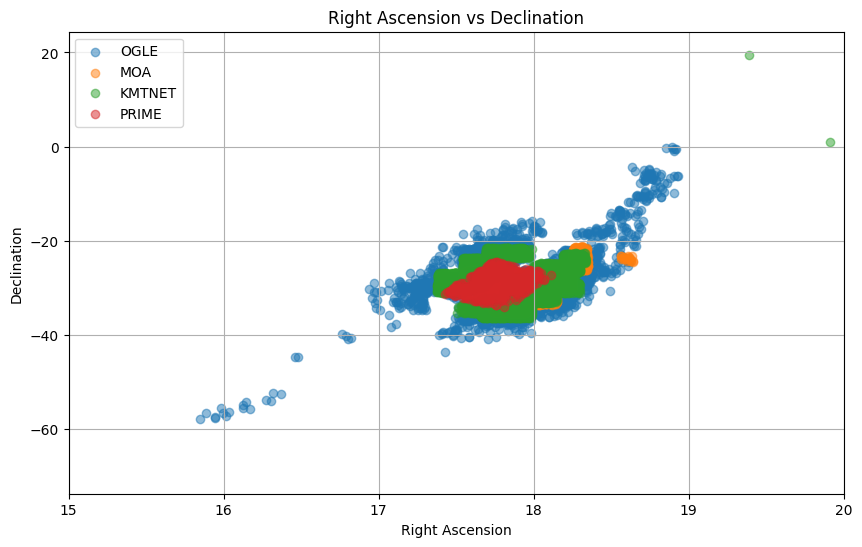

0 264.5731666666666 -28.461916666666667
1 265.1505416666667 -33.347944444444444
2 264.4120416666666 -29.397972222222222
3 264.74016666666665 -26.287805555555558
4 264.73125 -26.272666666666666
5 267.03345833333333 -22.732638888888886
6 266.6660833333333 -23.609527777777778
7 265.61616666666663 -34.676249999999996
8 266.8797916666666 -33.892583333333334
9 279.4406666666667 -18.614333333333335


Index(['obj_id', 'ra', 'dec', 'origin', 'summary', 'alias', 'source_origin',
       't0', 'tE', 't0_err', 'tE_err', 'u0', 'u0_err', 'Amax', 'Amax_err',
       'Isrc', 'Ibase', 'Isrc_err', 'Ibase_err', 'srcfrac', 'srcfrac_err',
       'alert_url', 'Roman_GBTDS', 'group_name', 'group_id', 'gal_lat',
       'gal_lon', 'classification', 'classification_probability', 'l', 'b'],
      dtype='object')

In [43]:
df = pd.concat([df_O, df_M, df_K, df_P], ignore_index=True)
# df = df_P
print(df.head())
print("Len of df: ", len(df))
# # Plot right ascension versus declination
plt.figure(figsize=(10, 6))
plt.scatter(df_O['ra']/15, df_O['dec'], alpha=0.5, label='OGLE')
plt.scatter(df_M['ra']/15, df_M['dec'], alpha=0.5, label='MOA')
plt.scatter(df_K['ra']/15, df_K['dec'], alpha=0.5, label='KMTNET')
plt.scatter(df_P['ra']/15, df_P['dec'], alpha=0.5, label='PRIME')
plt.title('Right Ascension vs Declination')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.xlim(15,20)
plt.grid(True)
plt.legend()
plt.show()

for i,item in enumerate(df['obj_id'].iloc[0:10]):
    print(i, df['ra'].iloc[i],df['dec'].iloc[i])
df.columns

In [44]:
print(df_M.head())
print(df_O["ra"])

     obj_id          ra        dec origin    summary alias source_origin  \
0  MB250343  268.221073 -29.884656    MOA  candidate  None           MOA   
1  MB250342  273.723889 -26.724825    MOA  candidate  None           MOA   
2  MB250341  272.412404 -28.745591    MOA  candidate  None           MOA   
3  MB250340  270.776641 -29.330260    MOA  candidate  None           MOA   
4  MB250339  271.338053 -28.609341    MOA  candidate  None           MOA   

           t0       tE  t0_err  tE_err       u0  u0_err  Amax  Amax_err  \
0  60932.8126  82.4338  0.0028  0.0857   0.0854  0.0001   0.0       0.0   
1  60916.0453   7.4123  0.0017  0.0023   5.9878  0.0021   0.0       0.0   
2  60917.6109  32.9887  0.0006  0.0114   0.6084  0.0003   0.0       0.0   
3  60908.7835   0.3612  0.0003  0.0006  13.9680  0.0229   0.0       0.0   
4  60931.0560  98.4319  0.0000  0.0808   0.0013  0.0000   0.0       0.0   

    Ibase  Ibase_err                                          alert_url  \
0  19.360      0.

In [45]:
# Let's diagnose the issue with the ra column
print("Data type of df_O['ra']:", df_O["ra"].dtype)
print("Sample values from df_O['ra']:")
print(df_O["ra"].head(10))
print("\nAny NaN values?", df_O["ra"].isna().any())
print("Any non-numeric values?", df_O["ra"].apply(lambda x: not isinstance(x, (int, float))).any())
print("\nShape of df_O:", df_O.shape)
print("Type of first ra value:", type(df_O["ra"].iloc[0]))

Data type of df_O['ra']: float64
Sample values from df_O['ra']:
0    264.573167
1    265.150542
2    264.412042
3    264.740167
4    264.731250
5    267.033458
6    266.666083
7    265.616167
8    266.879792
9    279.440667
Name: ra, dtype: float64

Any NaN values? False
Any non-numeric values? False

Shape of df_O: (24102, 31)
Type of first ra value: <class 'numpy.float64'>


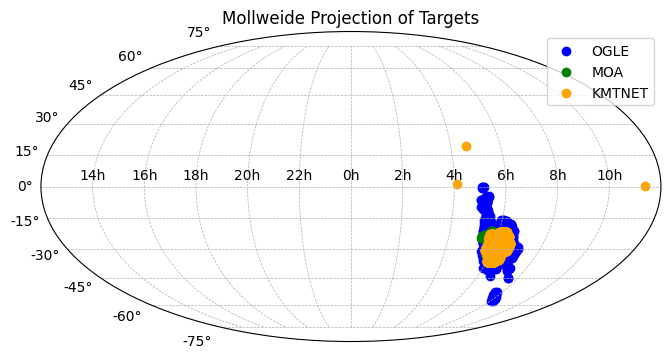

In [46]:
# Convert RA to radians, shifting from [0, 360] to [-180, 180] for Mollweide
df_O["ra_rad"] = np.radians(360 - df_O["ra"])  # Mollweide requires longitude in [-180, 180]
df_O["dec_rad"] = np.radians(df_O["dec"])  # Convert Declination to radians

df_M["ra_rad"] = np.radians(360 - df_M["ra"])  # Mollweide requires longitude in [-180, 180]
df_M["dec_rad"] = np.radians(df_M["dec"])  # Convert Declination to radians

df_K["ra_rad"] = np.radians(360 - df_K["ra"])  # Mollweide requires longitude in [-180, 180]
df_K["dec_rad"] = np.radians(df_K["dec"])  # Convert Declination to radians

# Plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection="mollweide")

ax.scatter(df_O["ra_rad"], df_O["dec_rad"], color="blue", marker="o", label="OGLE")
ax.scatter(df_M["ra_rad"], df_M["dec_rad"], color="green", marker="o", label="MOA")
ax.scatter(df_K["ra_rad"], df_K["dec_rad"], color="orange", marker="o", label="KMTNET")


ax.grid(True, linestyle="--", linewidth=0.5)
ax.set_xticklabels(["14h", "16h", "18h", "20h", "22h", "0h", "2h", "4h", "6h", "8h", "10h"])
ax.set_title("Mollweide Projection of Targets")

plt.legend()
plt.show()


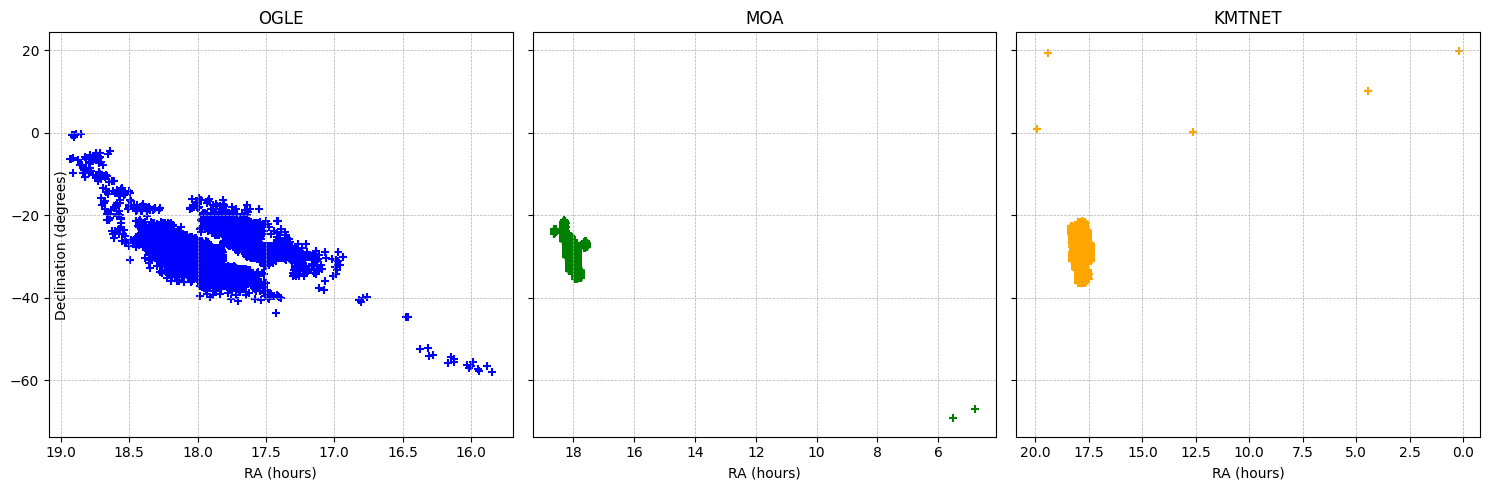

In [47]:
# Create figure and 3 subplots in a single row (columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot OGLE
axes[0].scatter(df_O["ra"] / 15, df_O["dec"], color="blue", marker="+", label="OGLE")
axes[0].set_title("OGLE")
axes[0].invert_xaxis()
axes[0].grid(True, linestyle="--", linewidth=0.5)
axes[0].set_xlabel("RA (hours)")

# Plot MOA
axes[1].scatter(df_M["ra"] / 15, df_M["dec"], color="green", marker="+", label="MOA")
axes[1].set_title("MOA")
axes[1].invert_xaxis()
axes[1].grid(True, linestyle="--", linewidth=0.5)
axes[1].set_xlabel("RA (hours)")

# Plot KMTNET
axes[2].scatter(df_K["ra"] / 15, df_K["dec"], color="orange", marker="+", label="KMTNET")
axes[2].set_title("KMTNET")
axes[2].invert_xaxis()
axes[2].grid(True, linestyle="--", linewidth=0.5)
axes[2].set_xlabel("RA (hours)")

# Shared Y-label (Declination)
fig.text(0.04, 0.5, "Declination (degrees)", va="center", rotation="vertical")

plt.tight_layout()
plt.show()

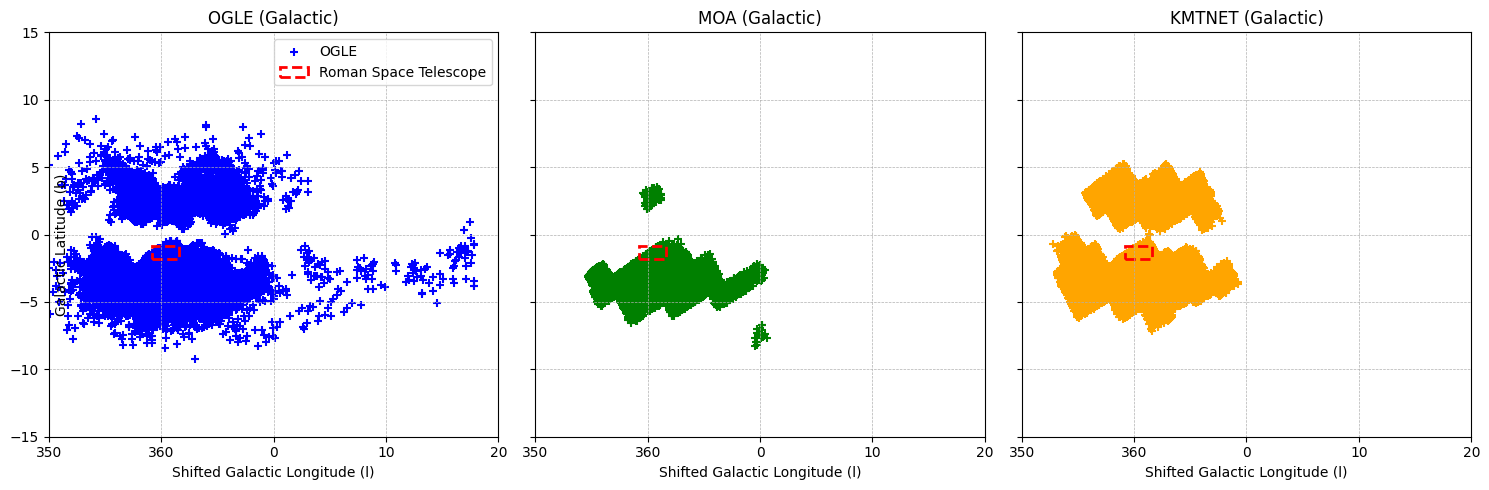

In [48]:
# Adjust Longitude: Shift l values so that 350-360 and 0-50 are adjacent
def shift_l_values(df):
    df["l_shifted"] = df["l"].apply(lambda x: x if x >= 350 else x + 360)
    return df

df_O = shift_l_values(df_O)
df_M = shift_l_values(df_M)
df_K = shift_l_values(df_K)

# Create figure and 3 subplots in a single row (columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Common X-axis range for continuity
l_min, l_max = 350, 390  # Shifted so that 0° appears next to 360°

# Roman Space Telescope footprint coordinates
# Galactic longitude: -0.8° to 1.6° (shifted to 359.2° to 361.6°)
# Galactic latitude: -1.85° to -0.85°
roman_l_min = 359.2  # -0.8° shifted
roman_l_max = 361.6  # 1.6° shifted
roman_b_min = -1.85
roman_b_max = -0.85

# Plot OGLE (Galactic Coordinates)
axes[0].scatter(df_O["l_shifted"], df_O["b"], color="blue", marker="+", label="OGLE")
axes[0].set_title("OGLE (Galactic)")
axes[0].set_xlim(l_min, l_max)
axes[0].set_ylim(-15,15)
axes[0].grid(True, linestyle="--", linewidth=0.5)
axes[0].set_xlabel("Shifted Galactic Longitude (l)")
# Add Roman Space Telescope footprint
roman_rect_0 = plt.Rectangle((roman_l_min, roman_b_min), 
                           roman_l_max - roman_l_min, 
                           roman_b_max - roman_b_min,
                           linewidth=2, edgecolor='red', facecolor='none', 
                           linestyle='--', label='Roman Space Telescope')
axes[0].add_patch(roman_rect_0)

# Plot MOA (Galactic Coordinates)
axes[1].scatter(df_M["l_shifted"], df_M["b"], color="green", marker="+", label="MOA")
axes[1].set_title("MOA (Galactic)")
axes[1].set_xlim(l_min, l_max)
axes[1].grid(True, linestyle="--", linewidth=0.5)
axes[1].set_xlabel("Shifted Galactic Longitude (l)")
# Add Roman Space Telescope footprint
roman_rect_1 = plt.Rectangle((roman_l_min, roman_b_min), 
                           roman_l_max - roman_l_min, 
                           roman_b_max - roman_b_min,
                           linewidth=2, edgecolor='red', facecolor='none', 
                           linestyle='--', label='Roman Space Telescope')
axes[1].add_patch(roman_rect_1)

# Plot KMTNET (Galactic Coordinates)
axes[2].scatter(df_K["l_shifted"], df_K["b"], color="orange", marker="+", label="KMTNET")
axes[2].set_title("KMTNET (Galactic)")
axes[2].set_xlim(l_min, l_max)
axes[2].grid(True, linestyle="--", linewidth=0.5)
axes[2].set_xlabel("Shifted Galactic Longitude (l)")
# Add Roman Space Telescope footprint
roman_rect_2 = plt.Rectangle((roman_l_min, roman_b_min), 
                           roman_l_max - roman_l_min, 
                           roman_b_max - roman_b_min,
                           linewidth=2, edgecolor='red', facecolor='none', 
                           linestyle='--', label='Roman Space Telescope')
axes[2].add_patch(roman_rect_2)

# Shared Y-label (Galactic Latitude)
fig.text(0.04, 0.5, "Galactic Latitude (b)", va="center", rotation="vertical")

# Adjust x-tick labels to show 350-360 and 0-50 as adjacent
xticks = [350, 360, 370, 380, 390]#, 400, 410]
xticklabels = ["350", "360", "0", "10", "20"]#, "30", "50"]

for ax in axes:
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

# Add legend to the first subplot to show the Roman Space Telescope footprint
axes[0].legend(loc='upper right')

plt.tight_layout()
plt.show()

l_min, l_max:  350 370


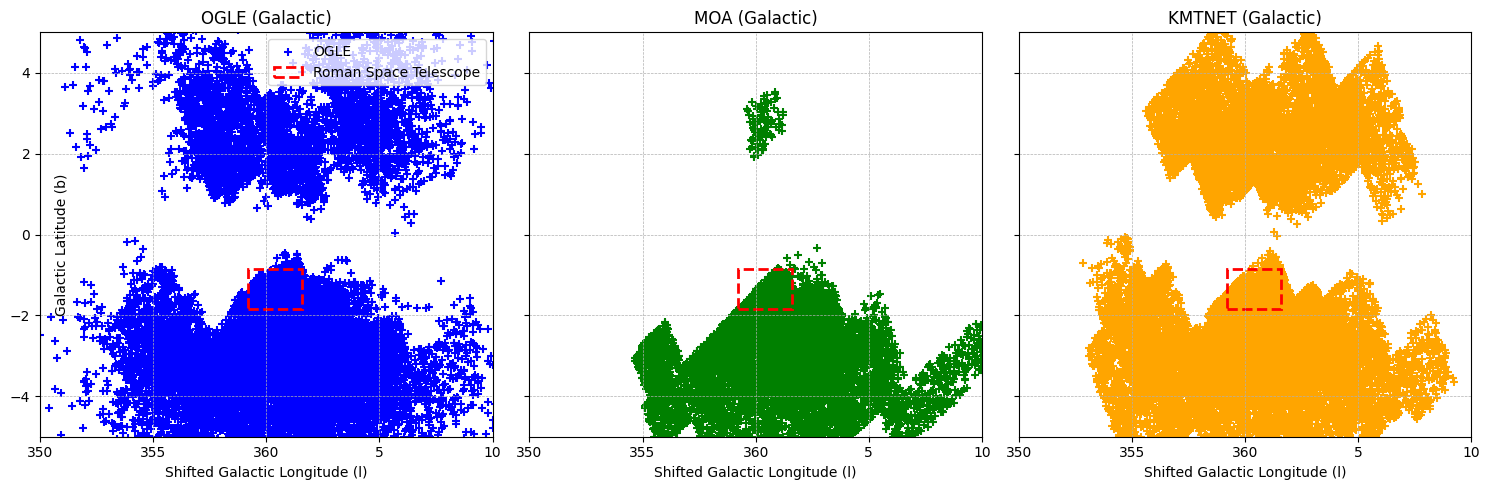

In [49]:
# ZOOM IN FROM LAST CELL

# Adjust Longitude: Shift l values so that 350-360 and 0-50 are adjacent
def shift_l_values(df):
    df["l_shifted"] = df["l"].apply(lambda x: x if x >= 350 else x + 360)
    return df

df_O = shift_l_values(df_O)
df_M = shift_l_values(df_M)
df_K = shift_l_values(df_K)

# Create figure and 3 subplots in a single row (columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True,sharex=True)

# Common X-axis range for continuity
l_min, l_max = 350, 390  # Shifted so that 0° appears next to 360°
l_min, l_max = 350, 370  # Shifted so that 0° appears next to 360°

# Roman Space Telescope footprint coordinates
# Galactic longitude: -0.8° to 1.6° (shifted to 359.2° to 361.6°)
# Galactic latitude: -1.85° to -0.85°
roman_l_min = 359.2  # -0.8° shifted
roman_l_max = 361.6  # 1.6° shifted
roman_b_min = -1.85
roman_b_max = -0.85

# Plot OGLE (Galactic Coordinates)
axes[0].scatter(df_O["l_shifted"], df_O["b"], color="blue", marker="+", label="OGLE")
axes[0].set_title("OGLE (Galactic)")
axes[0].set_xlim(l_min,l_max)
print("l_min, l_max: ", l_min, l_max)

axes[0].set_ylim(-5,5)
axes[0].grid(True, linestyle="--", linewidth=0.5)
axes[0].set_xlabel("Shifted Galactic Longitude (l)")
# Add Roman Space Telescope footprint
roman_rect_0 = plt.Rectangle((roman_l_min, roman_b_min), 
                           roman_l_max - roman_l_min, 
                           roman_b_max - roman_b_min,
                           linewidth=2, edgecolor='red', facecolor='none', 
                           linestyle='--', label='Roman Space Telescope')
axes[0].add_patch(roman_rect_0)

# Plot MOA (Galactic Coordinates)
axes[1].scatter(df_M["l_shifted"], df_M["b"], color="green", marker="+", label="MOA")
axes[1].set_title("MOA (Galactic)")
axes[1].set_xlim(l_min, l_max)
axes[1].grid(True, linestyle="--", linewidth=0.5)
axes[1].set_xlabel("Shifted Galactic Longitude (l)")
# Add Roman Space Telescope footprint
roman_rect_1 = plt.Rectangle((roman_l_min, roman_b_min), 
                           roman_l_max - roman_l_min, 
                           roman_b_max - roman_b_min,
                           linewidth=2, edgecolor='red', facecolor='none', 
                           linestyle='--', label='Roman Space Telescope')
axes[1].add_patch(roman_rect_1)

# Plot KMTNET (Galactic Coordinates)
axes[2].scatter(df_K["l_shifted"], df_K["b"], color="orange", marker="+", label="KMTNET")
axes[2].set_title("KMTNET (Galactic)")
axes[2].set_xlim(l_min, l_max)
axes[2].grid(True, linestyle="--", linewidth=0.5)
axes[2].set_xlabel("Shifted Galactic Longitude (l)")
# Add Roman Space Telescope footprint
roman_rect_2 = plt.Rectangle((roman_l_min, roman_b_min), 
                           roman_l_max - roman_l_min, 
                           roman_b_max - roman_b_min,
                           linewidth=2, edgecolor='red', facecolor='none', 
                           linestyle='--', label='Roman Space Telescope')
axes[2].add_patch(roman_rect_2)

# Shared Y-label (Galactic Latitude)
fig.text(0.04, 0.5, "Galactic Latitude (b)", va="center", rotation="vertical")

# Adjust x-tick labels to show 350-360 and 0-50 as adjacent
# if l_min == 350 and l_max == 390:
#     xticks = [350, 360, 370, 380, 390]#, 400, 410]
#     xticklabels = ["350", "360", "0", "10", "20"]#, "30", "50"]
if l_min == 350 and l_max == 370:
    xticks = [350, 355,360,365, 370]#, 400, 410]
    xticklabels = ["350", "355","360","5", "10"]# "20"]#, "30", "50"]

for ax in axes:
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

# Add legend to the first subplot to show the Roman Space Telescope footprint
axes[0].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [50]:
# Identify sources that are in the Roman Space Telescope footprint
def identify_roman_sources(df):
    # Define the Roman Space Telescope footprint in Galactic coordinates
    roman_l_min = 359.2  # -0.8° shifted
    roman_l_max = 361.6  # 1.6° shifted
    roman_b_min = -1.85
    roman_b_max = -0.85

    # Identify sources within the footprint
    mask = (
        (df["l_shifted"] >= roman_l_min) & (df["l_shifted"] <= roman_l_max) &
        (df["b"] >= roman_b_min) & (df["b"] <= roman_b_max)
    )
    return df[mask]

df_M_roman = identify_roman_sources(df_M)
df_O_roman = identify_roman_sources(df_O)
df_K_roman = identify_roman_sources(df_K)
print("Number of OGLE sources in Roman footprint:", len(df_O_roman))
print("Number of MOA sources in Roman footprint:", len(df_M_roman))
print("Number of KMTNET sources in Roman footprint:", len(df_K_roman))
df_O_roman.head()

Number of OGLE sources in Roman footprint: 2140
Number of MOA sources in Roman footprint: 727
Number of KMTNET sources in Roman footprint: 2014


,obj_id,ra,dec,origin,summary,alias,source_origin,t0,tE,t0_err,tE_err,u0,u0_err,Amax,Amax_err,Isrc,Ibase,Isrc_err,Ibase_err,srcfrac,srcfrac_err,alert_url,Roman_GBTDS,group_name,group_id,gal_lat,gal_lon,classification,classification_probability,l,b,ra_rad,dec_rad,l_shifted
28,OB251314,268.869792,-28.821306,OGLE,candidate,None,OGLE,60930.099,37.243,7.826,3.027,1.968,0.059,1.064,0.006,16.916,16.916,0.000,0.000,1.000,0.000,https://ogle.astrouw.edu.pl/ogle4/ews/2025/blg...,True,Sitewide Group,2,-1.794779,1.204347,NaN,NaN,1.204355,-1.794782,1.590522,-0.503027,361.204355
35,OB251307,267.857375,-29.591833,OGLE,candidate,None,OGLE,60916.058,6.184,0.468,0.387,1.114,0.017,1.271,0.009,17.166,17.166,0.000,0.000,1.000,0.000,https://ogle.astrouw.edu.pl/ogle4/ews/2025/blg...,True,Sitewide Group,2,-1.423644,0.091756,NaN,NaN,0.091764,-1.423647,1.608192,-0.516475,360.091764
36,OB251306,267.925917,-30.185000,OGLE,candidate,None,OGLE,60924.134,10.095,1.192,1.235,0.000,0.000,99999.999,0.000,18.856,18.856,0.001,0.001,1.000,0.000,https://ogle.astrouw.edu.pl/ogle4/ews/2025/blg...,True,Sitewide Group,2,-1.777318,-0.388320,NaN,NaN,359.611688,-1.777321,1.606996,-0.526828,359.611688
37,OB251305,268.131542,-29.123111,OGLE,candidate,None,OGLE,60915.039,43.986,1.317,10.199,0.192,0.073,5.285,1.969,21.038,19.146,0.507,0.002,0.175,0.082,https://ogle.astrouw.edu.pl/ogle4/ews/2025/blg...,True,Sitewide Group,2,-1.390436,0.616984,NaN,NaN,0.616992,-1.390439,1.603407,-0.508294,360.616992
77,OB251268,268.732958,-29.067222,OGLE,candidate,None,OGLE,60905.207,7.359,0.223,0.313,0.957,0.021,1.374,0.017,18.393,18.393,0.001,0.001,1.000,0.000,https://ogle.astrouw.edu.pl/ogle4/ews/2025/blg...,True,Sitewide Group,2,-1.815269,0.931460,NaN,NaN,0.931468,-1.815272,1.592910,-0.507319,360.931468


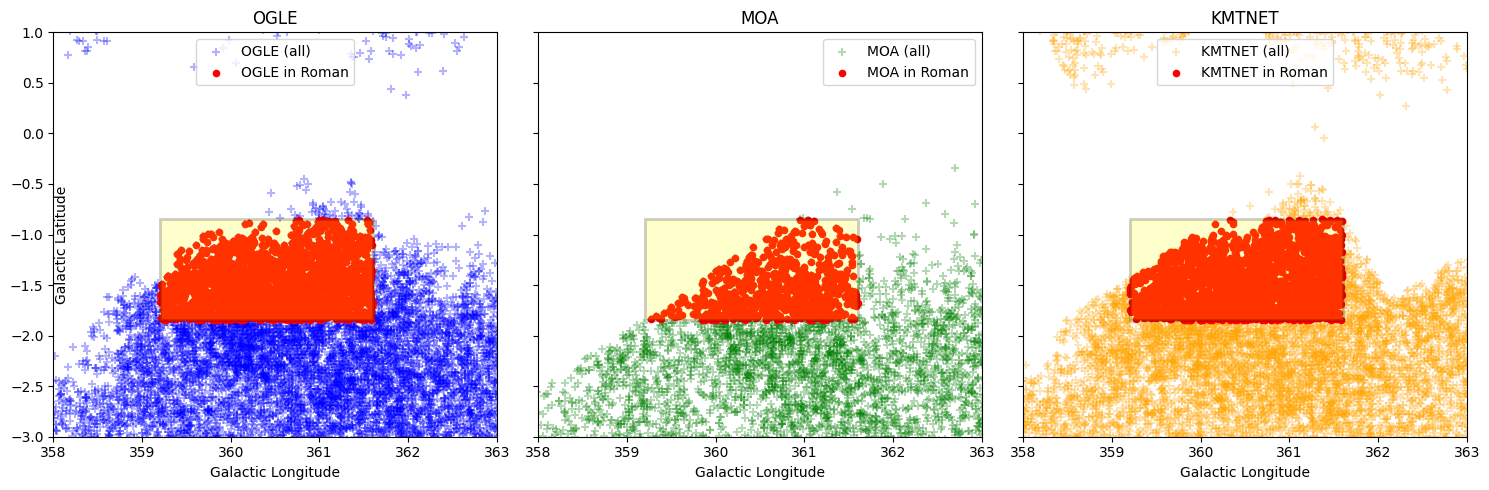

In [ ]:
# ZOOM IN ON ROMAN FIELD
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set axis for tight zoom around Roman footprint, with appx. 1 degree of buffer
l_min, l_max = 358, 363
b_min, b_max = -3, 1

surveys = [
    (df_O, "OGLE", "blue", axes[0]),
    (df_M, "MOA", "green", axes[1]), 
    (df_K, "KMTNET", "orange", axes[2])
]

for df, name, color, ax in surveys:
    roman_sources = identify_roman_sources(df)
    ax.scatter(df["l_shifted"], df["b"], color=color, marker="+", alpha=0.3, label=f"{name} (all)")
    ax.scatter(roman_sources["l_shifted"], roman_sources["b"], color="red", marker="o", s=20, label=f"{name} in Roman")
    
    roman_rect = plt.Rectangle((roman_l_min, roman_b_min), roman_l_max-roman_l_min, roman_b_max-roman_b_min,
                             linewidth=2, edgecolor='black', facecolor='yellow', alpha=0.2)
    ax.add_patch(roman_rect)
    
    ax.set_title(f"{name}")
    ax.set_xlabel("Galactic Longitude")
    ax.set_xlim(l_min, l_max)
    ax.set_ylim(b_min, b_max)
    ax.legend()

fig.text(0.04, 0.5, "Galactic Latitude", va="center", rotation="vertical")
plt.tight_layout()
plt.show()

In [ ]:
# BASIC STATISTICS
print("\n" + "="*50)
print("ROMAN FIELD STATISTICS: Sources in Roman Field/Total Sources")
print("="*50)

roman_counts = {
    'OGLE': len(df_O_roman),
    'MOA': len(df_M_roman), 
    'KMTNET': len(df_K_roman)
}

total_sources = {
    'OGLE': len(df_O),
    'MOA': len(df_M),
    'KMTNET': len(df_K)
}

for survey in roman_counts:
    count = roman_counts[survey]
    total = total_sources[survey]
    percentage = (count / total) * 100
    print(f"{survey}: {count:,} / {total:,} = {percentage:.2f}%")

total_all = sum(total_sources.values())
total_roman = sum(roman_counts.values())
print(f"\nOverall: {total_roman:,} / {total_all:,} = {(total_roman/total_all)*100:.4f}%")


ROMAN FIELD STATISTICS: Sources in Roman Field/Total
OGLE: 2,140 / 24,102 = 8.88%
MOA: 727 / 9,389 = 7.74%
KMTNET: 2,014 / 25,836 = 7.80%

Overall: 4,881 / 59,327 = 8.2273%


In [60]:
# Use each of the _roman dataframes to update an annotation, using the 
# from mntleaf_utils import update_roman_annotation

In [61]:
# Try to update one annotation.
# def update_roman_annotation(source_id, is_in_roman_footprint)
# print(df_O_roman['obj_id'].iloc[0])
# update_roman_annotation(df_O_roman['obj_id'].iloc[0], True)

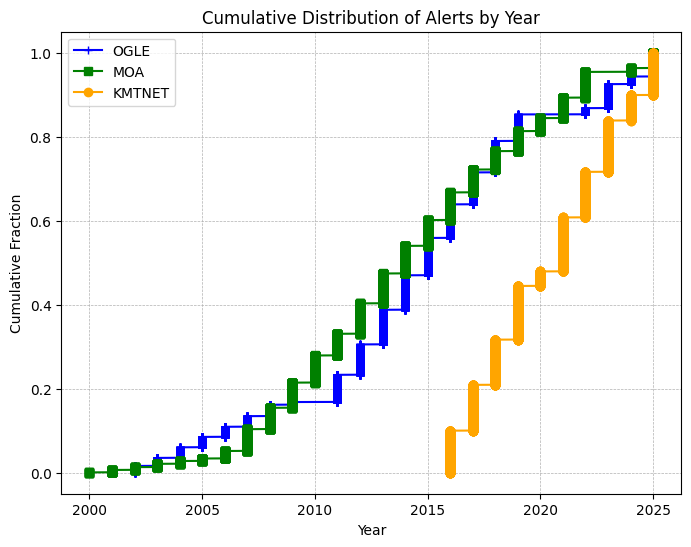

In [62]:
# Function to compute cumulative distribution
def cumulative_distribution(df):
    years_sorted = np.sort(df["year"].values)
    cumulative = np.arange(1, len(years_sorted) + 1) / len(years_sorted)
    return years_sorted, cumulative

# Function to extract and convert the two-digit year from 'id'
def extract_year(df):
    df["year"] = df["obj_id"].str[2:4].astype(int)  # Extract 3rd and 4th characters (year)
    df["year"] = df["year"].apply(lambda x: x + 2000 if x >= 50 else x + 2000)  # Convert to full year
    return df

# Apply extraction to all dataframes
df_O = extract_year(df_O)
df_M = extract_year(df_M)
df_K = extract_year(df_K)

# Get cumulative data
years_O, cum_O = cumulative_distribution(df_O)
years_M, cum_M = cumulative_distribution(df_M)
years_K, cum_K = cumulative_distribution(df_K)

# Plot cumulative distributions
plt.figure(figsize=(8, 6))

plt.plot(years_O, cum_O, label="OGLE", color="blue", marker="+", linestyle="-")
plt.plot(years_M, cum_M, label="MOA", color="green", marker="s", linestyle="-")
plt.plot(years_K, cum_K, label="KMTNET", color="orange", marker="o", linestyle="-")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Cumulative Fraction")
plt.title("Cumulative Distribution of Alerts by Year")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)

plt.show()